In [19]:
import astropy.io.fits as fits
import numpy as np
from astropy.table import unique,Table,setdiff,hstack,join,QTable,vstack
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import warnings
from scipy.stats import sem
import seaborn as sns
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.coordinates import SkyCoord, angular_separation

In [17]:
# test again on small sample, this time save in numpy array

# read in definite galaxies + rands, just work with these for now..
HSC_G09_rands = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_rand_1.0.fits')
HSC_G09_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_galaxies.fits')

# sami gals
SAMI_G09_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_sami_1.4.fits')
print("read in complete!")

random_sample_size = len(HSC_G09_gals)

indices = np.random.randint(len(HSC_G09_rands), size = random_sample_size)
print("shuffle complete!")

# now repeat for various z 
redshifts = [0.275, 0.25, 0.225, 0.2, 0.175, 0.15, 0.125, 0.10]

for k in redshifts:
    
    print("starting z <",k)

    CATIDS = np.zeros(len(SAMI_G09_gals))
    RA = np.zeros(len(SAMI_G09_gals))
    DEC = np.zeros(len(SAMI_G09_gals))
    Z = np.zeros(len(SAMI_G09_gals))
    object_ids = np.zeros((len(SAMI_G09_gals),200000))
    distances = np.zeros((len(SAMI_G09_gals),200000))
    HSC_ra = np.zeros((len(SAMI_G09_gals),200000))
    HSC_dec = np.zeros((len(SAMI_G09_gals),200000))

    for i in range(len(SAMI_G09_gals)):
        ang_diam_1rad = SAMI_G09_gals['ANG_DIAM_DIST'][i]
        CATIDS[i] = SAMI_G09_gals['CATID'][i]
        RA[i] = SAMI_G09_gals['RA'][i]
        DEC[i] = SAMI_G09_gals['DEC'][i]
        Z[i] = SAMI_G09_gals['Z_SPEC'][i]

        col = 0

        for j in range(random_sample_size):      
            ang_sep = angular_separation(SAMI_G09_gals['RA_RAD'][i],SAMI_G09_gals['DEC_RAD'][i],
                                HSC_G09_rands['ra_rad'][indices[j]],HSC_G09_rands['dec_rad'][indices[j]])
            sep = ang_sep*ang_diam_1rad

            if sep < 1:
                object_ids[i][col] = HSC_G09_rands['object_id'][indices[j]]
                HSC_ra[i][col] = HSC_G09_rands['ra'][indices[j]]
                HSC_dec[i][col] = HSC_G09_rands['dec'][indices[j]]
                distances[i][col] = sep
                col+=1

        print(i+1,"/",len(SAMI_G09_gals),"done")

    chunk = QTable()
    chunk['CATID'] = CATIDS
    chunk['RA'] = RA
    chunk['DEC'] = DEC
    chunk['Z'] = Z
    chunk['RAND_OBJECT_ID'] = object_ids
    chunk['RAND_DISTANCE'] = distances
    chunk['RAND_HSC_RA'] = HSC_ra
    chunk['RAND_HSC_DEC'] = HSC_dec

    chunk.write('/suphys/fscu5535/HSC_work/mod_data/G09_rands_rev_{}.fits'.format(k),overwrite=True)


read in complete!
shuffle complete!
1 / 676 done
2 / 676 done
3 / 676 done
4 / 676 done
5 / 676 done
6 / 676 done
7 / 676 done
8 / 676 done
9 / 676 done
10 / 676 done
11 / 676 done
12 / 676 done
13 / 676 done
14 / 676 done
15 / 676 done
16 / 676 done
17 / 676 done
18 / 676 done
19 / 676 done
20 / 676 done
21 / 676 done
22 / 676 done
23 / 676 done
24 / 676 done
25 / 676 done
26 / 676 done
27 / 676 done
28 / 676 done
29 / 676 done
30 / 676 done
31 / 676 done
32 / 676 done
33 / 676 done
34 / 676 done
35 / 676 done
36 / 676 done
37 / 676 done
38 / 676 done
39 / 676 done
40 / 676 done
41 / 676 done
42 / 676 done
43 / 676 done
44 / 676 done
45 / 676 done
46 / 676 done
47 / 676 done
48 / 676 done
49 / 676 done
50 / 676 done
51 / 676 done
52 / 676 done
53 / 676 done
54 / 676 done
55 / 676 done
56 / 676 done
57 / 676 done
58 / 676 done
59 / 676 done
60 / 676 done
61 / 676 done
62 / 676 done
63 / 676 done
64 / 676 done
65 / 676 done
66 / 676 done
67 / 676 done
68 / 676 done
69 / 676 done
70 / 67

552 / 676 done
553 / 676 done
554 / 676 done
555 / 676 done
556 / 676 done
557 / 676 done
558 / 676 done
559 / 676 done
560 / 676 done
561 / 676 done
562 / 676 done
563 / 676 done
564 / 676 done
565 / 676 done
566 / 676 done
567 / 676 done
568 / 676 done
569 / 676 done
570 / 676 done
571 / 676 done
572 / 676 done
573 / 676 done
574 / 676 done
575 / 676 done
576 / 676 done
577 / 676 done
578 / 676 done
579 / 676 done
580 / 676 done
581 / 676 done
582 / 676 done
583 / 676 done
584 / 676 done
585 / 676 done
586 / 676 done
587 / 676 done
588 / 676 done
589 / 676 done
590 / 676 done
591 / 676 done
592 / 676 done
593 / 676 done
594 / 676 done
595 / 676 done
596 / 676 done
597 / 676 done
598 / 676 done
599 / 676 done
600 / 676 done
601 / 676 done
602 / 676 done
603 / 676 done
604 / 676 done
605 / 676 done
606 / 676 done
607 / 676 done
608 / 676 done
609 / 676 done
610 / 676 done
611 / 676 done
612 / 676 done
613 / 676 done
614 / 676 done
615 / 676 done
616 / 676 done
617 / 676 done
618 / 676 

In [10]:
chunk.rename_column('DISTANCE','RAND_DISTANCE')
chunk.info()

<QTable length=676>
      name       dtype    shape  
--------------- ------- ---------
          CATID float64          
 RAND_OBJECT_ID float64 (200000,)
  RAND_DISTANCE float64 (200000,)
    RAND_HSC_RA float64 (200000,)
   RAND_HSC_DEC float64 (200000,)
RAND_HSC_PHOTOZ float64 (200000,)


In [20]:
# combine random and real data
# G09_reals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_real_2.0.fits')

G09_reals = join(G09_reals,chunk,keys='CATID',join_type='left')
G09_reals.info()
G09_reals.remove_column('RE_CIRC_KPC_2')
G09_reals.info()

<QTable length=676>
     name       dtype    shape      unit      class     n_bad
-------------- ------- --------- --------- ------------ -----
         CATID float64                           Column     0
 RE_CIRC_KPC_1 float64                     MaskedColumn    18
     OBJECT_ID   int64 (200000,)                 Column     0
      DISTANCE float64 (200000,)                 Column     0
    PAIR_TOTAL   int64                     MaskedColumn     0
         ELLIP float64                     MaskedColumn    18
    LAMBDAR_RE float64                     MaskedColumn   286
 ANG_DIAM_DIST float64           Mpc / rad     Quantity     0
            RA float32                 deg     Quantity     0
           DEC float32                 deg     Quantity     0
        Z_SPEC float32                           Column     0
            xi float64     (20,)                 Column     7
        HSC_RA float64 (200000,)                 Column     0
       HSC_DEC float64 (200000,)                 C

In [21]:
G09_reals.write('/suphys/fscu5535/HSC_work/mod_data/G09_real_rand_1.0.fits',overwrite=True)

Text(0.5, 1.0, 'RANDOM pair counts for all G09 SAMI galaxies')

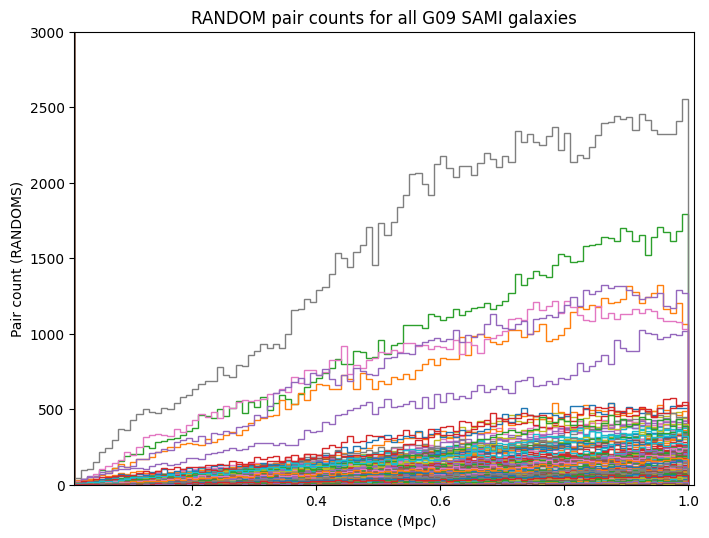

In [13]:
real_rand = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_real_rand_1.0.fits')

plt.figure(figsize=(8,6),dpi=100)
for i in range(len(G09_reals)):
    plt.hist(real_rand['RAND_DISTANCE'][i],bins=100,histtype='step',fill=False)
plt.xlim(0.01,1.01)
plt.ylim(0,3000)
plt.xlabel("Distance (Mpc)")
plt.ylabel("Pair count (RANDOMS)")
plt.title("RANDOM pair counts for all G09 SAMI galaxies")

Text(0.5, 1.0, 'RANDOM pair counts for all G09 SAMI galaxies')

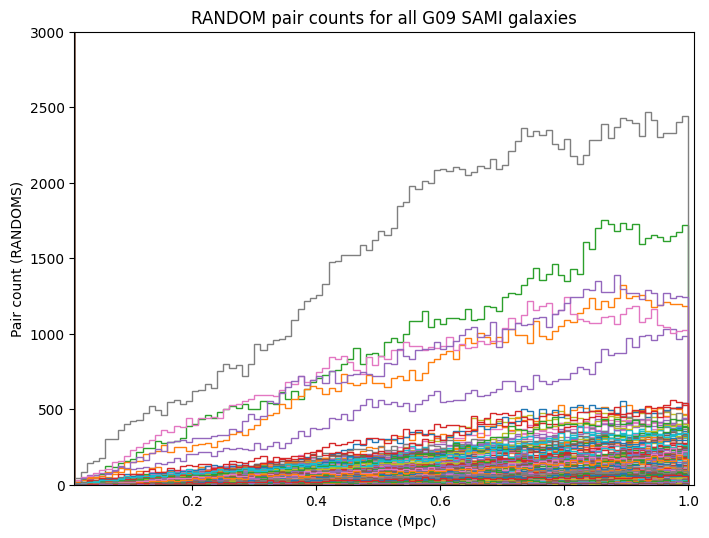

In [19]:
plt.figure(figsize=(8,6),dpi=100)
for i in range(len(chunk)):
    plt.hist(chunk['DISTANCE'][i],bins=100,histtype='step',fill=False)
plt.xlim(0.01,1.01)
plt.ylim(0,3000)
plt.xlabel("Distance (Mpc)")
plt.ylabel("Pair count (RANDOMS)")
plt.title("RANDOM pair counts for all G09 SAMI galaxies")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172


/tmp/ipykernel_42288/975371727.py:13: RuntimeWarning: divide by zero encountered in divide
  ratio = n_real / n_rand


173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422


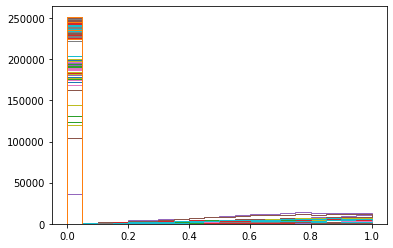

In [29]:
#read in reals
G09_reals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_real_1.4.fits')
ratios = np.zeros(20)

# try to calculate the ratio
for i in range(len(chunk)):
    n_real,bin_real,patches = plt.hist(G09_reals['DISTANCE'][i],bins=20,
                                                          histtype='step',fill=False)
    
    n_rand,bin_rand,patches = plt.hist(chunk['DISTANCE'][i],bins=20,
                                                          histtype='step',fill=False)
    
    ratio = n_real / n_rand
    ratios = np.vstack((ratios,ratio))
    print(i)


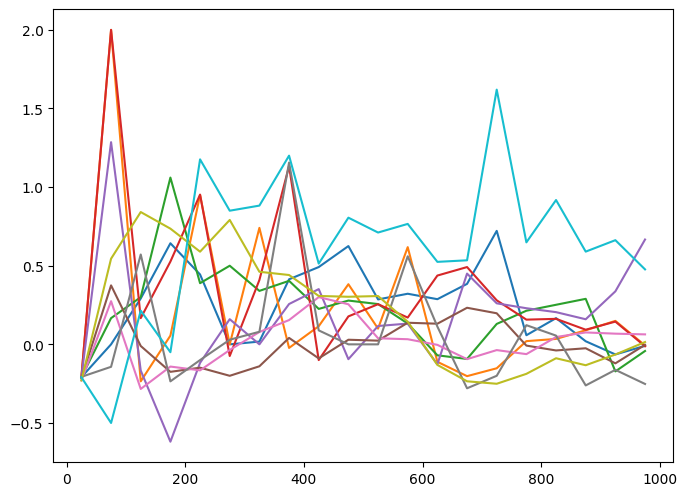

In [39]:
plt.figure(figsize=(8,6),dpi=100)
radii = [25,75,125,175,225,275,325,375,425,475,525,575,625,675,725,775,825,875,925,975]
for i in range(1,11):
    plt.plot(radii,ratios[i]-1)

In [42]:
G09_reals['xi'] = new_ratio
G09_reals.info()

<Table length=676>
     name      dtype    shape      unit      class     n_bad
------------- ------- --------- --------- ------------ -----
        CATID   int64                     MaskedColumn     0
  RE_CIRC_KPC float64                     MaskedColumn    18
    OBJECT_ID   int64 (200000,)                 Column     0
     DISTANCE float64 (200000,)                 Column     0
   PAIR_TOTAL   int64                     MaskedColumn     0
        ELLIP float64                     MaskedColumn    18
   LAMBDAR_RE float64                     MaskedColumn   286
ANG_DIAM_DIST float64           Mpc / rad       Column     0
           RA float32                 deg       Column     0
          DEC float32                 deg       Column     0
       Z_SPEC float32                           Column     0
           xi float64     (20,)                 Column     7


In [43]:
G09_reals.write('/suphys/fscu5535/HSC_work/mod_data/G09_real_1.3.fits')

In [53]:
G09_reals['xi'][0]

array([-0.20865339,  0.        ,  0.29166667,  0.64285714,  0.44444444,
        0.        ,  0.01754386,  0.4137931 ,  0.49152542,  0.625     ,
        0.28571429,  0.32183908,  0.28723404,  0.38461538,  0.72164948,
        0.05797101,  0.16666667,  0.01960784, -0.06417112, -0.00956938])

In [4]:
HSC_G09_rands = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_rand_1.0.fits')
print(HSC_G09_rands['ra'][0:10])
print(HSC_G09_rands['ra_rad'][0:10])

print(HSC_G09_rands['ra_rad'][0:10]/HSC_G09_rands['ra'][0:10])


        ra        
------------------
128.59398040169518
128.69992732705543
 128.6635878957845
128.60628946094252
  128.720812364157
128.68054938113153
128.77047193581112
 128.7161568935714
128.62788114696247
128.74168298576927
      ra_rad      
       rad        
------------------
 2.244388356254641
2.2462374789345425
2.2456032362105622
2.2446031898663303
 2.246601991596366
 2.245899269975897
2.2474687146268604
 2.246520738306417
2.2449800358784353
 2.246966252660438
       ra_rad       
        rad         
--------------------
0.017453292519943295
0.017453292519943295
0.017453292519943295
0.017453292519943295
0.017453292519943295
0.017453292519943295
0.017453292519943295
0.017453292519943295
0.017453292519943295
0.017453292519943295


In [8]:
randsisprim = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09randsisprimary.fits')

ra_rad = np.zeros(len(randsisprim))
dec_rad = np.zeros(len(randsisprim))

for i in range(len(randsisprim)):
    ra_rad[i] = randsisprim['ra'][i]*0.017453292519943295
    dec_rad[i] = randsisprim['dec'][i]*0.017453292519943295
    
randsisprim['ra_rad'] = ra_rad
randsisprim['dec_rad'] = dec_rad

randsisprim.info()

print(randsisprim['ra'][0:10])
print(randsisprim['ra_rad'][0:10])
print(randsisprim['ra_rad'][0:10]/randsisprim['ra'][0:10])

<Table length=33758718>
      name        dtype 
---------------- -------
       object_id   int64
object_id_isnull    bool
              ra float64
       ra_isnull    bool
             dec float64
      dec_isnull    bool
          ra_rad float64
         dec_rad float64
        ra        
------------------
128.65450445285603
128.59208168558305
128.64288657154637
128.62967290041513
128.59652156931986
128.66911995697484
 128.6187868923204
128.59631270534237
128.67729690538695
  128.637430553002
      ra_rad      
------------------
2.2454447002240436
 2.244355217406924
 2.245241929943084
 2.245011307875568
 2.244432707996537
2.2456997888927557
2.2448213111919166
 2.244429062632441
2.2458425035653127
 2.245146704455435
       ra_rad       
--------------------
0.017453292519943295
0.017453292519943295
0.017453292519943295
0.017453292519943295
0.017453292519943295
0.017453292519943295
0.017453292519943295
0.017453292519943295
0.017453292519943295
0.017453292519943295


In [12]:
countid = 0
countra = 0
countdec = 0
for i in range(len(randsisprim)):
    
    if randsisprim['object_id_isnull'][i] == True:
        countid+=1
    if randsisprim['ra_isnull'][i] == True:
        countra+=1
    if randsisprim['dec_isnull'][i] == True:
        countdec+=1
               
print(countid,countra,countdec)

0 0 0


In [14]:
randsisprim.remove_columns(['object_id_isnull','ra_isnull','dec_isnull'])
randsisprim.info()

<Table length=33758718>
   name    dtype 
--------- -------
object_id   int64
       ra float64
      dec float64
   ra_rad float64
  dec_rad float64


In [15]:
randsisprim.write('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_rand_1.0.fits',overwrite=True)

Text(0.5, 1.0, 'G09 rands (sampled) isprimary == True')

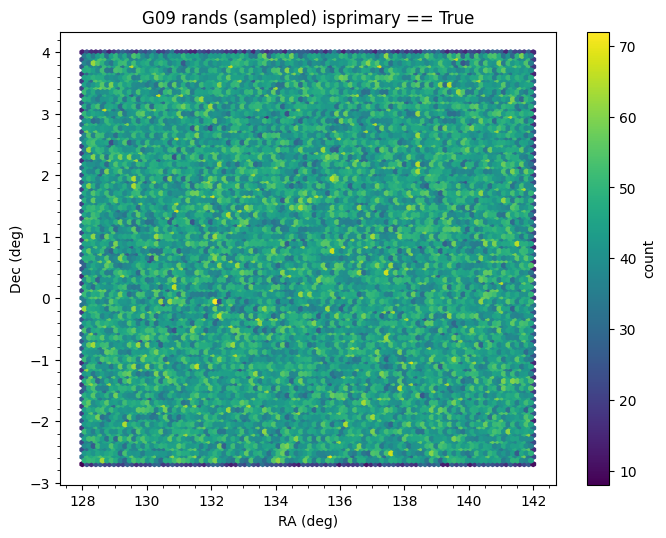

In [18]:
testra = np.zeros(len(HSC_G09_gals))
testdec = np.zeros(len(HSC_G09_gals))

col = 0
for i in indices:
    testra[col] = randsisprim['ra'][i]
    testdec[col] = randsisprim['dec'][i]
    col+=1

plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(testra,testdec)
plt.minorticks_on()
cb = plt.colorbar()
cb.set_label('count')
plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)")
plt.title("G09 rands (sampled) isprimary == True")